In [63]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as mp
from matplotlib import style
from matplotlib import pyplot as plt

In [5]:
# Example that I followed
# https://matheusfacure.github.io/python-causality-handbook/14-Difference-in-Difference.html

In [47]:
# Read in data for both boston and portland 
dfBoston = pd.read_csv('BostonData.csv')
dfPortland = pd.read_csv('PortlandData.csv')

In [48]:
#Group by year and combine dataframes
dfBoston = dfBoston.groupby('Year').mean()
dfBoston['City']='Boston'
dfPortland = dfPortland.groupby('Year').mean()
dfPortland['City']='Portland'
df_raw = dfBoston.append(dfPortland)
df_raw = df_raw.drop(['Week','Average Duration (sec)'], axis=1)

In [93]:
df = df_raw.copy()
df = df.rename(columns = {'Number Trips':'Number_Trips',
                          'Number Stations':'Number_Stations',
                          'Number Bikes':'Number_Bikes'})
# Create Dummy Variables
df['Boston'] = 0
df['Boston'] = df['Boston'].where(df['City']=='Portland',1)
df['Portland'] = 0
df['Portland'] = df['Portland'].where(df['City']=='Boston',1)
df['Treatment'] = 0
df['Treatment'] = df['Treatment'].where(df.index<2017,1)
df = df.drop(['City'], axis=1)
df['Trips_Per_Station']=df['Number_Trips'] / df['Number_Stations']
df['Trips_Per_Bike']=df['Number_Trips'] / df['Number_Bikes']
df['Bikes_Per_Station'] = df['Number_Bikes'] / df['Number_Stations']
df = df.drop(2015)
df

,Number_Trips,Number_Stations,Number_Bikes,Boston,Portland,Treatment,Trips_Per_Station,Trips_Per_Bike,Bikes_Per_Station
Year,,,,,,,,,
2016,13238.500000,172.068711,1569.521571,1,0,0,76.937288,8.434736,9.121482
2017,12238.357143,195.227530,1865.162832,1,0,1,62.687661,6.561549,9.553790
2018,17373.571429,211.588004,2341.606178,1,0,1,82.110380,7.419510,11.066819
2019,21388.230769,288.015504,3154.463769,1,0,1,74.260693,6.780306,10.952410
2016,4487.285714,99.539886,937.289922,0,1,0,45.080278,4.787511,9.416225
2017,3867.214286,138.707767,998.000000,0,1,1,27.880301,3.874964,7.194983
2018,3732.000000,177.797825,1015.997907,0,1,1,20.990133,3.673236,5.714344
2019,2942.461538,199.890094,1038.271140,0,1,1,14.720397,2.834001,5.194210


In [94]:
bos_before = df.loc[(df['Boston']==1) &
                    (df['Treatment']==0)].mean()
bos_after = df.loc[(df['Boston']==1) &
                    (df['Treatment']==1)].mean()
bos_before = bos_before.drop(['Boston','Portland','Treatment'])
bos_after = bos_after.drop(['Boston','Portland','Treatment'])

In [95]:
port_before = df.loc[(df['Portland']==1) &
                    (df['Treatment']==0)].mean()
port_after = df.loc[(df['Portland']==1) &
                    (df['Treatment']==1)].mean()
port_before = port_before.drop(['Boston','Portland','Treatment'])
port_after = port_after.drop(['Boston','Portland','Treatment'])

In [97]:
treat = 'Trips_Per_Station'
diff_in_diff = (bos_after[treat] - bos_before[treat]) - (port_after[treat] - port_before[treat])
diff_in_diff

19.965623954960382

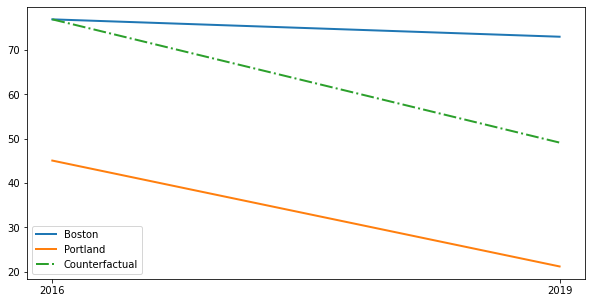

In [98]:
plt.figure(figsize=(10,5))
plt.plot(['2016','2019'], [bos_before[treat], bos_after[treat]], label="Boston", lw=2)
plt.plot(['2016','2019'], [port_before[treat], port_after[treat]], label="Portland", lw=2)

plt.plot(['2016','2019'], [bos_before[treat], bos_after[treat] + (port_after[treat] - port_before[treat])],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend();

In [99]:
smf.ols(str(treat + ' ~ Boston*Treatment'), data=df).fit().summary().tables[1]

/home/trevorb/miniconda3/envs/osemosys/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.0803,8.330,5.411,0.006,21.951,68.209
Boston,31.8570,11.781,2.704,0.054,-0.852,64.567
Treatment,-23.8833,9.619,-2.483,0.068,-50.591,2.824
Boston:Treatment,19.9656,13.604,1.468,0.216,-17.804,57.735
